In [1]:
using Pkg; Pkg.activate("..");

using StochasticFrontiers;

  Activating project at `~/Documents/project/StochasticFrontiers.jl`
[ Info: Precompiling StochasticFrontiers [207de5b1-58d8-4e40-9f1b-ffdd2ece041b]


In [2]:
# Example: Half Normal


# model specification
res = sfmodel_fit(
    spec = sfspec(
        usedata("data/CrossData.csv"), 
        model     = :Cross, 
        type      = :Prod, 
        dist      = Half(σᵤ² = (:age, :school, :yr, :_cons)),
        σᵥ²       = :_cons, 
        depvar    = :yvar, 
        frontiers = (:Lland, :PIland, :Llabor, :Lbull, :Lcost, :yr, :_cons)
    )
);


 * Model specification

    Base stochastic frontier model

    Yᵢ = Xᵢ*β + + ϵᵢ
        where ϵᵢ = vᵢ - uᵢ

        further,     
            vᵢ ∼ N(0, σᵥ²),
            σᵥ²  = exp(log_σᵥ²)

            uᵢ ∼ N⁺(0, σᵤ²),
            σᵤ² = exp(log_σᵤ²)

    In the case of type(cost), "- uᵢₜ" above should be changed to "+ uᵢₜ"


 * optimization(with warmstart) 

*********************************
       Estimation Results:
*********************************

 Numberf Of Observations:    271
 Log-likelihood Value:       -87.37549
 Time Consuming:             0.014913082122802734

 Converged:                  true
 Number Of Total Iterations: 112
 Iteration Limit Reached:    false

┌──────────┬────────┬─────────┬───────────┬──────────┬──────────┬───────────┬───────────┐
│          │   Var. │   Coef. │ Std. Err. │        z │ Pr(>|z|) │ Lower 95% │ Upper 95% │
├──────────┼────────┼─────────┼───────────┼──────────┼──────────┼───────────┼───────────┤
│ fontiers │  Lland │  0.2949 │    0.0729 │ 

In [3]:
# estimated coefficients
sfmaximizer(res)

12-element Vector{Float64}:
  0.29488529300080374
  0.23191833211405027
  1.1390090208279116
 -0.41646030105231996
  0.015396635994621892
  0.014472198771712585
  1.7323104744656481
 -0.0076485643830681935
 -0.00827729780021223
 -0.15175694320203095
 -0.16963599553724124
 -3.4986571848932715

In [14]:
marginal, marginal_mean = sfmarginal(res)
marginal

Row,marg_age,marg_school,marg_yr
,Float64,Float64,Float64
1,-0.00522016,-0.023474,-0.0134693
2,-0.00636249,-0.0285745,-0.00756082
3,-0.00775711,-0.0348048,-0.00112862
4,-0.00953811,-0.0427643,0.00631516
5,-0.0119062,-0.0533508,0.0155006
6,-0.00860434,-0.0386115,-0.00255577
7,-0.0105773,-0.0474275,0.00597855
8,-0.0165443,-0.0741016,0.0293439
9,-0.021126,-0.0945861,0.0464716


In [4]:
# bootstrap std of the mean marginal effects
std_ci, bsdata = sfmarginal(
    res,
    bootstrap   = true,
    R           = 20,
    seed        = 123,
    getBootData = true
);

 * bootstrap marginanl effect



Resampling: 100%|██████████████████████████████| Time: 0:00:00



Bias-Corrected 95.0% Confidence Interval:

┌────────┬──────────────────────┬─────────────────┬──────────────────────┐
│        │ mean of the marginal │ std.err. of the │       bias-corrected │
│        │       effect on E(u) │     mean effect │    95.0%  conf. int. │
├────────┼──────────────────────┼─────────────────┼──────────────────────┤
│    age │             -0.00154 │         0.00263 │  [-0.00634, 0.00485] │
│ school │             -0.00167 │         0.01181 │  [-0.01723, 0.02814] │
│     yr │             -0.03062 │         0.01378 │ [-0.04314, -0.00512] │
└────────┴──────────────────────┴─────────────────┴──────────────────────┘



In [5]:
# Example: Exponential

# model specification
res = sfmodel_fit(
    spec=sfspec(
        usedata("data/dairy.csv"), 
        model     = :Cross, 
        type      = :Prod, 
        dist      = Expo(λ = (:comp, :_cons)),
        σᵥ²       = :_cons, 
        depvar    = :ly, 
        frontiers = (:llabor, :lfeed, :lcattle, :lland, :_cons)
    ),
    options=sfopt(
        warmstart_solver = nothing, 
        main_maxIT       = 5000
    ),
    init=sfinit(
        log_λ²  = [-0.1, -0.1], 
        log_σᵥ² = -0.1
    )
);


 * Model specification

    Base stochastic frontier model

    Yᵢ = Xᵢ*β + + ϵᵢ
        where ϵᵢ = vᵢ - uᵢ

        further,     
            vᵢ ∼ N(0, σᵥ²),
            σᵥ²  = exp(log_σᵥ²)

            uᵢ ∼ N⁺(0, σᵤ²),
            σᵤ² = exp(log_σᵤ²)

    In the case of type(cost), "- uᵢₜ" above should be changed to "+ uᵢₜ"


 * optimization(with warmstart) 

*********************************
       Estimation Results:
*********************************

 Numberf Of Observations:    196
 Log-likelihood Value:       110.77905
 Time Consuming:             0.023149967193603516

 Converged:                  true
 Number Of Total Iterations: 8
 Iteration Limit Reached:    false

┌──────────┬─────────┬─────────┬───────────┬──────────┬──────────┬───────────┬───────────┐
│          │    Var. │   Coef. │ Std. Err. │        z │ Pr(>|z|) │ Lower 95% │ Upper 95% │
├──────────┼─────────┼─────────┼───────────┼──────────┼──────────┼───────────┼───────────┤
│ fontiers │  llabor │  0.0966 │    0.0436 

In [6]:
# efficiency and inefficiency index

[sf_efficiency(res) sf_inefficiency(res)]

196×2 Matrix{Float64}:
 0.953755  0.0481744
 0.904313  0.102861
 0.94883   0.0534947
 0.905893  0.101072
 0.923821  0.0809567
 0.928323  0.0759602
 0.769161  0.266647
 0.931354  0.0726092
 0.953738  0.0481927
 0.556152  0.590991
 0.879708  0.131067
 0.950838  0.0513214
 0.919613  0.085647
 ⋮         
 0.906756  0.100096
 0.953485  0.0484653
 0.957508  0.0441408
 0.820138  0.20216
 0.946169  0.056381
 0.827765  0.192819
 0.883583  0.126582
 0.957695  0.0439408
 0.941419  0.0615565
 0.947962  0.0544357
 0.926691  0.077769
 0.930017  0.0740863

In [7]:
# marginal effect

marginal, marginal_mean = sfmarginal(res)
marginal_mean

(marg_comp = -0.0002825284144627235,)

In [2]:
# Example: Truncated Normal, Wang 2002


# model specification
res = sfmodel_fit(
    spec = sfspec(
        usedata("data/CrossData.csv"), 
        model     = :Cross, 
        type      = :Prod, 
        dist      = Trun(μ = (:age, :school, :yr, :_cons), σᵤ² = (:age, :school, :yr, :_cons)),
        σᵥ²       = :_cons, 
        depvar    = :yvar, 
        frontiers = (:Lland, :PIland, :Llabor, :Lbull, :Lcost, :yr, :_cons)
    ),
    options = sfopt(warmstart_maxIT = 400),
    init = sfinit(
        μ       = fill(0.1, 4), 
        log_σᵤ² = fill(-0.1, 4), 
        log_σᵥ² = -0.1
    )
);


 * Model specification

    Base stochastic frontier model

    Yᵢ = Xᵢ*β + + ϵᵢ
        where ϵᵢ = vᵢ - uᵢ

        further,     
            vᵢ ∼ N(0, σᵥ²),
            σᵥ²  = exp(log_σᵥ²)

            uᵢ ∼ N⁺(0, σᵤ²),
            σᵤ² = exp(log_σᵤ²)

    In the case of type(cost), "- uᵢₜ" above should be changed to "+ uᵢₜ"


 * optimization(with warmstart) 

*********************************
       Estimation Results:
*********************************

 Numberf Of Observations:    271
 Log-likelihood Value:       -82.02573
 Time Consuming:             0.06599998474121094

 Converged:                  true
 Number Of Total Iterations: 419
 Iteration Limit Reached:    false

┌──────────┬────────┬─────────┬───────────┬──────────┬──────────┬───────────┬───────────┐
│          │   Var. │   Coef. │ Std. Err. │        z │ Pr(>|z|) │ Lower 95% │ Upper 95% │
├──────────┼────────┼─────────┼───────────┼──────────┼──────────┼───────────┼───────────┤
│ fontiers │  Lland │  0.2582 │    0.0725 │  

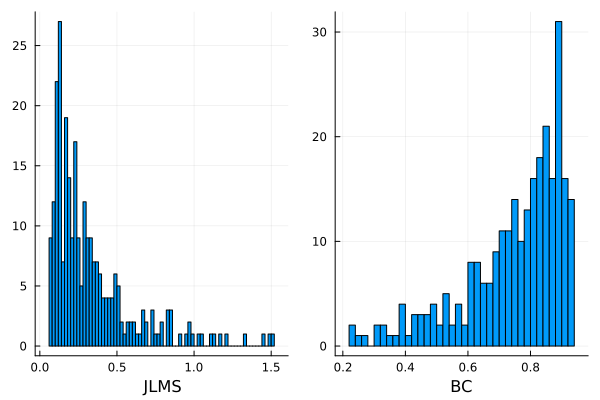

In [3]:
# plot the efficiency and inefficiency index

plot_inefficieny(res)

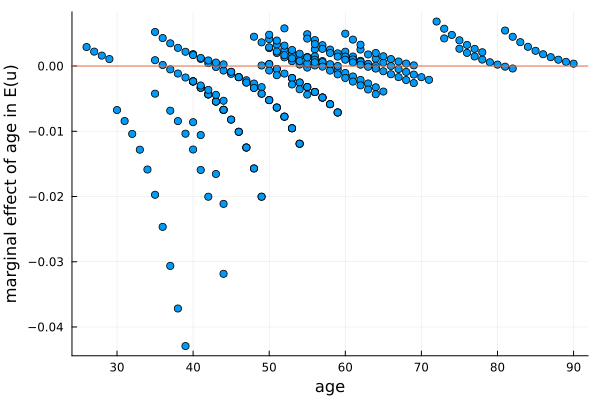

In [4]:
# plot the marginal effect
using CSV, DataFrames, Plots


marginal, marginal_mean = sfmarginal(res)
df = DataFrame(CSV.File("data/CrossData.csv"))
plot(
    df.age,
    marginal[:, :marg_age],
    seriestype = :scatter,
    xlabel     = "age", 
    ylabel     = "marginal effect of age in E(u)",
    label      = false
)
hline!([0.00], label = "")

In [6]:
# bootstrap std of mean marginal effects
std_ci, bsdata = sfmarginal(
    res,
    bootstrap   = true,
    R           = 100,
    seed        = 1232,
    iter        = 100,
    getBootData =  true
);

 * bootstrap marginanl effect



Resampling: 100%|██████████████████████████████| Time: 0:00:20



Bias-Corrected 95.0% Confidence Interval:

┌────────┬──────────────────────┬─────────────────┬──────────────────────┐
│        │ mean of the marginal │ std.err. of the │       bias-corrected │
│        │       effect on E(u) │     mean effect │    95.0%  conf. int. │
├────────┼──────────────────────┼─────────────────┼──────────────────────┤
│    age │             -0.00264 │         0.00202 │  [-0.00738, 0.00114] │
│ school │             -0.01197 │         0.01207 │  [-0.03823, 0.00939] │
│     yr │             -0.02650 │         0.01344 │ [-0.05355, -0.00192] │
└────────┴──────────────────────┴─────────────────┴──────────────────────┘



In [12]:
# confidence interval of mean marginal effect
ci = sfCI(
    bootdata  = bsdata, 
    _observed = marginal_mean, 
    level     = 0.1
)


Bias-Corrected 90.0% Confidence Interval:



3-element Vector{Vector{Float64}}:
 [-0.00687, 0.00073]
 [-0.0316, 0.00695]
 [-0.04771, -0.00464]